In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('kicksharing.csv')
if df['book_start_dttm'].isnull().sum() == 0:
    print('нет неопределённых значений в датах')
df

нет неопределённых значений в датах


,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396744,349109813,755778419,M,18,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,6.49,30.0,300.0,E,1.555069,2024-09-25 11:39:42.000000,2024-09-25 11:39:46.885000,2024-09-25 11:45:41.545313,5,2024-09-25 13:39:46.885000,68.94,6.89,NaN
396745,348829245,1146263947,M,23,NaN,NaN,КАЛИНИНГРАДСКАЯ ОБЛ,8.99,30.0,300.0,Max,2.270902,2024-09-24 20:05:43.000000,2024-09-24 20:05:46.954000,2024-09-24 20:13:58.592279,2,2024-09-24 19:05:46.954000,110.91,13.09,NaN
396746,273529251,1012601147,M,20,NaN,NaN,ТЮМЕНСКАЯ ОБЛ,8.79,50.0,300.0,E,1.411171,2024-09-03 16:07:43.000000,2024-09-03 16:07:45.311487,2024-09-03 16:28:07.510118,3,2024-09-03 16:07:45.311487,234.59,234.59,NaN
396747,306062051,863877659,M,19,NaN,NaN,Г САНКТ-ПЕТЕРБУРГ,7.49,50.0,300.0,SL,1.002400,2024-09-12 18:28:48.000000,2024-09-12 18:28:50.401000,2024-09-12 18:32:22.911827,3,2024-09-12 18:28:50.401000,79.96,79.96,NaN


In [51]:
df.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_rk,396749.0,NaN,NaN,NaN,289223558.141203,38134583.990429,252611203.0,261815012.0,270436665.0,343267787.0,356252786.0
party_rk,396749.0,NaN,NaN,NaN,598842595.687586,331167510.804468,14717.0,296232305.0,611009154.0,864692067.0,1301075452.0
gender_cd,393828,2,M,335458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,396749.0,NaN,NaN,NaN,31.544006,9.434545,12.0,24.0,31.0,37.0,94.0
education_level_cd,190059,5,GRD,94341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status_cd,217729,5,UNM,116094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lvn_state_nm,362572,212,Г МОСКВА,90897,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minute_cost,396749.0,NaN,NaN,NaN,7.288688,1.289492,1.5,6.49,7.49,8.22,19.99
activation_cost,396749.0,NaN,NaN,NaN,42.593226,11.989974,0.0,30.0,50.0,50.0,50.0
hold_amount,396749.0,NaN,NaN,NaN,299.983869,1.939153,80.0,300.0,300.0,300.0,500.0


In [52]:
df.info()
df.value_counts('book_start_dttm')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

book_start_dttm
2024-10-09 14:02:54.249000    2
2024-09-17 13:44:24.183000    2
2024-10-14 16:28:49.916000    2
2024-09-19 04:56:36.412000    2
2024-09-08 15:35:00.835000    1
                             ..
2024-08-03 12:28:24.272587    1
2024-08-03 12:28:22.744695    1
2024-08-03 12:27:58.071417    1
2024-08-03 12:27:23.712279    1
2024-08-03 12:30:57.329310    1
Name: count, Length: 396745, dtype: int64

In [53]:
columns = list(df.columns)
df[columns[12:15] + [columns[16]]] = df[columns[12:15] + [columns[16]]].apply(pd.to_datetime, errors='coerce')
print(df['book_start_dttm'].iloc[0])
df.info()

2024-08-07 09:47:29.325252
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 396749 non-null  int64         
 1   party_rk                 396749 non-null  int64         
 2   gender_cd                393828 non-null  object        
 3   age                      396749 non-null  int64         
 4   education_level_cd       190059 non-null  object        
 5   marital_status_cd        217729 non-null  object        
 6   lvn_state_nm             362572 non-null  object        
 7   minute_cost              396749 non-null  float64       
 8   activation_cost          396749 non-null  float64       
 9   hold_amount              396749 non-null  float64       
 10  transport_model          396749 non-null  object        
 11  distance_km              396749 non-null  float64  

<Figure size 1000x800 with 0 Axes>

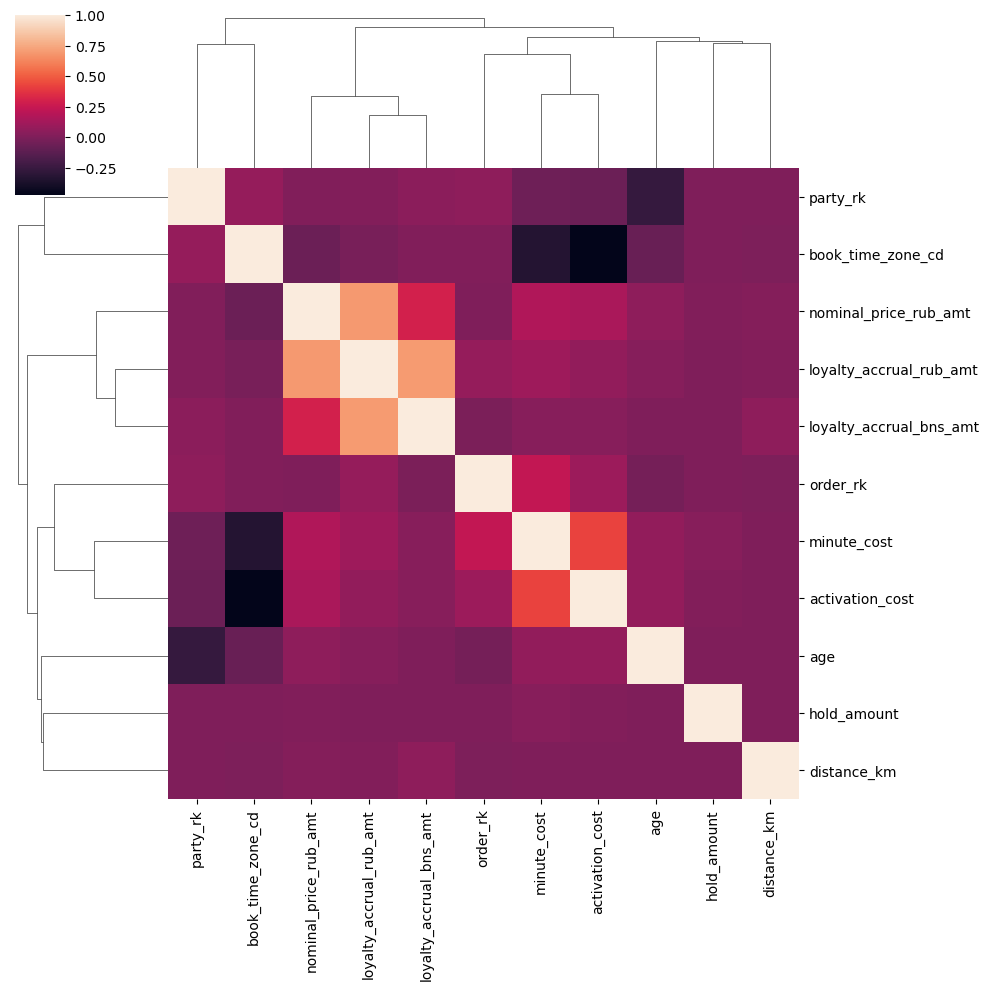

In [57]:
fig = plt.figure(figsize=(10, 8))
corrs = df.corr(numeric_only= True, method='pearson')
sns.clustermap(corrs)
plt.title('Анализ корелляций между переменными, а также кластеризация по ним')

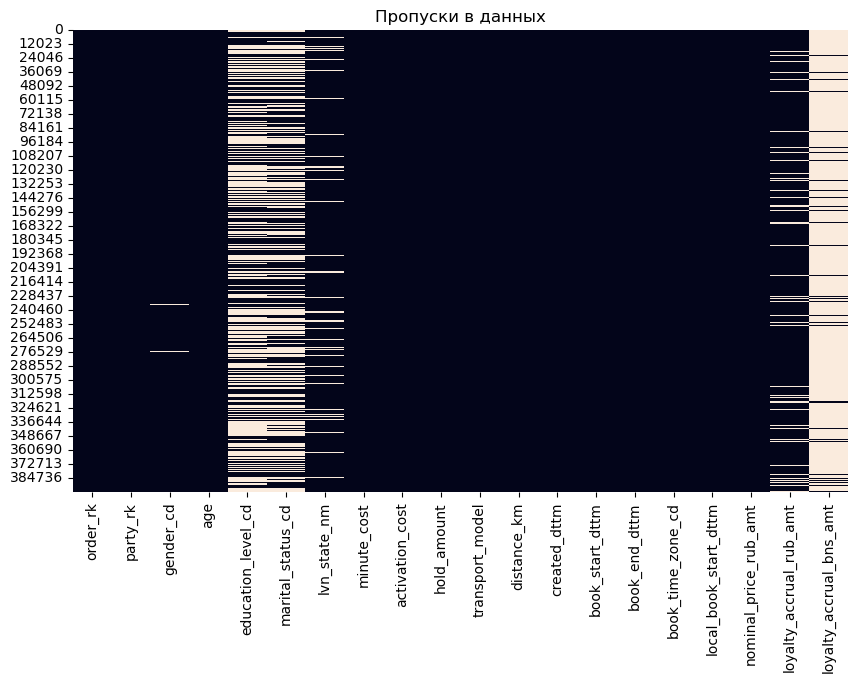

374801


loyalty_accrual_bns_amt    374801
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
loyalty_accrual_rub_amt     29757
gender_cd                    2921
order_rk                        0
party_rk                        0
age                             0
hold_amount                     0
activation_cost                 0
minute_cost                     0
distance_km                     0
transport_model                 0
created_dttm                    0
book_start_dttm                 0
book_time_zone_cd               0
book_end_dttm                   0
nominal_price_rub_amt           0
local_book_start_dttm           0
dtype: int64

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Пропуски в данных")
plt.show()

print(df.isnull().sum().sort_values(ascending=False).iloc[0])
df.isnull().sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Распределение длительности поездок в мин')

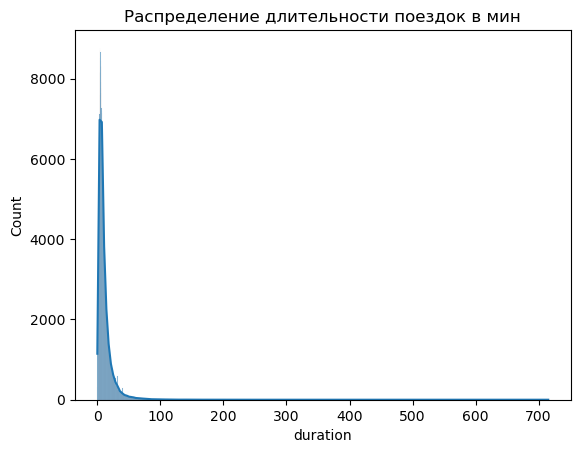

In [61]:
df['duration'] = (df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() / 60
sns.histplot(df['duration'], kde=True)
plt.title('Распределение длительности поездок в мин')

Text(0.5, 1.0, 'Возрастное распределение пользователей')

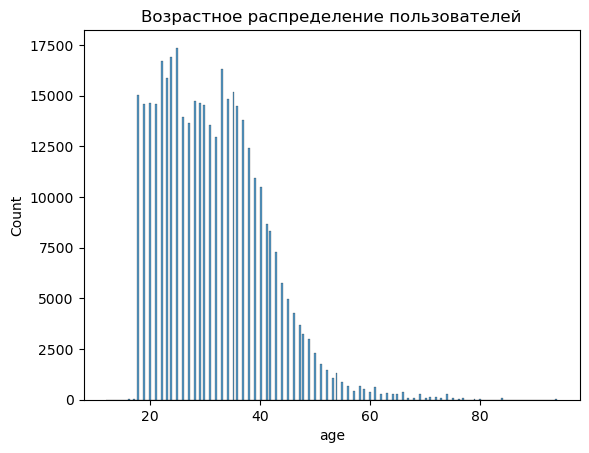

In [64]:
sns.histplot(df['age'])
plt.title('Возрастное распределение пользователей')


Text(0.5, 1.0, 'взаимосвязь: Длительность, Стоимость поездки')

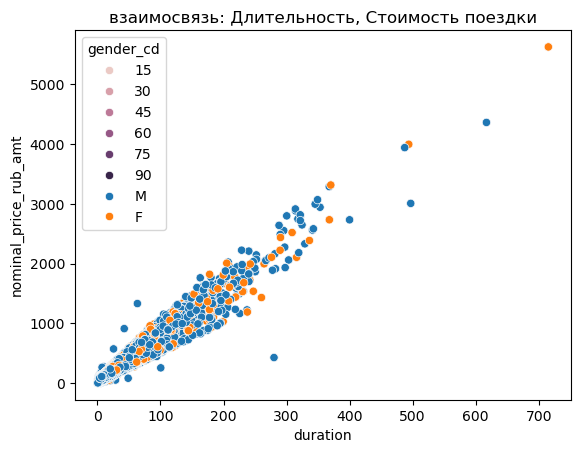

In [66]:
sns.scatterplot( data=df, x='duration', y='nominal_price_rub_amt', hue= 'age')
plt.title('взаимосвязь: Длительность, Стоимость поездки')

Text(0.5, 1.0, 'взаимосвязь: Длительность, Стоимость поездки')

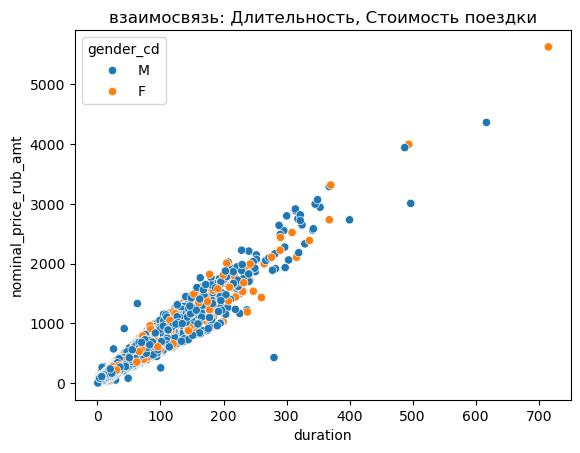

In [69]:

sns.scatterplot( data=df, x='duration', y='nominal_price_rub_amt', hue= 'gender_cd')
plt.title('взаимосвязь: Длительность, Стоимость поездки')

In [71]:
## Наблюдается прямая зависимость между длительностью и стоимостью поездки.
## Большинство пользователей — мужчины в возрасте 20–30 лет.
### Гипотезы
# Если ввести семейные или групповые тарифы - средняя продолжительность аренды увеличится.
# Если ввести скидки пенсионерам и семьянинам, то появится более равномерное распределение возрастов пользоателей

# Не успел по времени немного,  поэтому, к сожалению, сделал без презентации и отчёта 

## Наблюдается прямая зависимость между длительностью и стоимостью поездки.
## Большинство пользователей — мужчины в возрасте 20–30 лет.
### Гипотезы
# Если ввести семейные или групповые тарифы - средняя продолжительность аренды увеличится.
# Если ввести скидки пенсионерам и семьянинам, то появится более равномерное распределение возрастов пользоателей

# Не успел по времени немного,  поэтому, к сожалению, сделал без презентации и отчёта 